In [1]:
# import libraries:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

import statsmodels.api as sm
import numpy as np

In [2]:
# loading the data:
df = pd.read_csv('daily-total-female-births.csv')
df

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [4]:
# convert date to datetime object
df['Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   Births  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [5]:
df.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [6]:
"""Stable when mean and median are very 
close to each other aka not skewed and normally distributed
As seen in the hist below"""

'Stable when mean and median are very \nclose to each other aka not skewed and normally distributed\nAs seen in the hist below'

<AxesSubplot: ylabel='Frequency'>

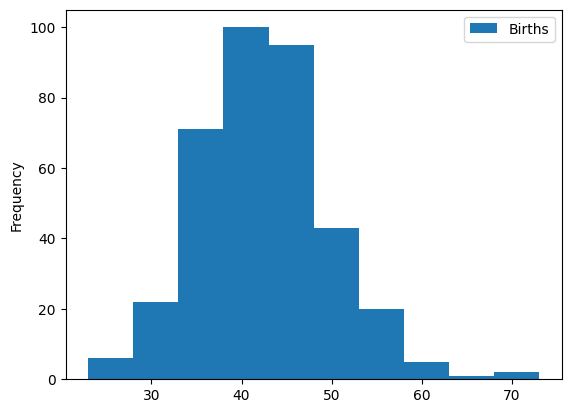

In [7]:
df.plot(kind='hist')

In [8]:
# set date as index
df.set_index('Date', inplace=True)
df

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


<AxesSubplot: xlabel='Date'>

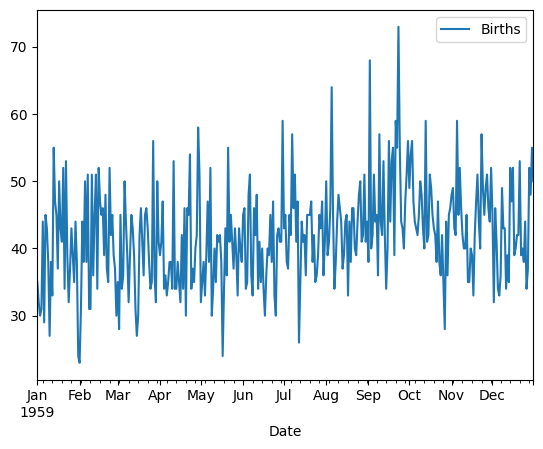

In [9]:
df.plot()

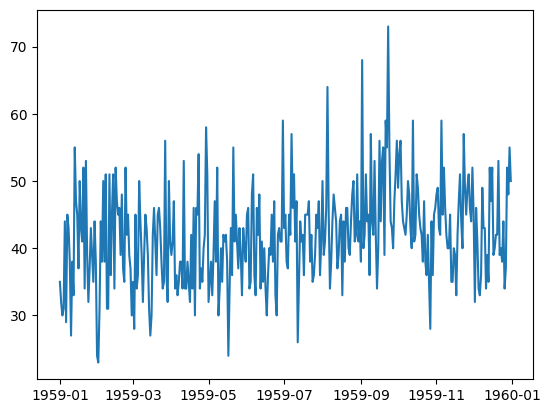

In [10]:
plt.plot(df)
# rolling mean is on top 

In [11]:
df

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [12]:
rollingmean = df.rolling(window=10).mean()
rollingmeanstd = df.rolling(window=10).std()
# this is taking the first 10 vals and calc the mean of those specific values
# used for visualization

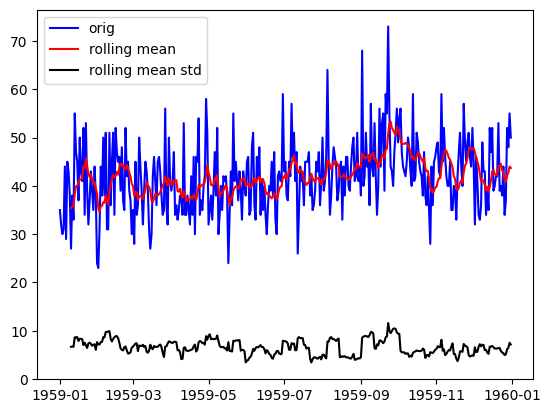

In [13]:
plt.plot(df, color='blue', label='orig')
plt.plot(rollingmean, color='red', label='rolling mean')
plt.plot(rollingmeanstd, color='black', label='rolling mean std')
plt.legend()
# visualize timeseries

# Adfuller

In [14]:
adfuller(df)

(-4.808291253559762,
 5.243412990149881e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [15]:
# stats timeseries
p_value = adfuller(df)[1]
p_value # 1 adfuller stats, 2nd is pval, 
# this series is kind of stationary but if it was bigger than no
# the chance of this happening randomly

5.243412990149881e-05

In [16]:
Test_Statistic = adfuller(df)[0]
Test_Statistic
# if test stat is less than the 5% then its stationary
# how much variance is in your data, 

-4.808291253559762

# T-Statistic

In [17]:
df.head(3)

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30


In [18]:
df['diff_Births'] = df['Births'].diff()
df

,Births,diff_Births
Date,,
1959-01-01,35,NaN
1959-01-02,32,-3.0
1959-01-03,30,-2.0
1959-01-04,31,1.0
1959-01-05,44,13.0
...,...,...
1959-12-27,37,3.0
1959-12-28,52,15.0
1959-12-29,48,-4.0


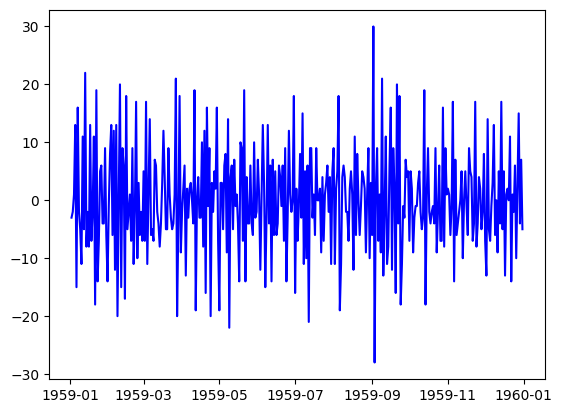

In [19]:

plt.plot(df.diff_Births, color='blue', label='orig')

In [20]:
adfuller(df.diff_Births.dropna())

(-12.62517863387135,
 1.547240009196956e-23,
 6,
 357,
 {'1%': -3.44880082033912,
  '5%': -2.869670179576637,
  '10%': -2.5711012838861036},
 2355.0565353964653)

In [21]:
# new_df = df.dropna()
# new_df = new_df[:-1]
# new_df

In [22]:
diff_values = df['diff_Births'].values
y = diff_values[~np.isnan(diff_values)]
y

array([ -3.,  -2.,   1.,  13., -15.,  16.,  -2.,  -5., -11.,  11.,  -5.,
        22.,  -8.,  -2.,  -8.,  13.,  -7.,  -2.,  11., -18.,  19., -14.,
        -7.,   5.,   6.,  -4.,  -4.,   9.,  -6., -14.,  -1.,   8.,  13.,
        -6.,  12., -12.,  13., -20.,   0.,  20., -15.,   9.,   6., -17.,
        18.,  -5.,  -2.,   1.,  -7.,   9., -11.,  -2.,  17., -10.,   3.,
        -6.,  -2.,  -7.,   5.,  -7.,  17., -11.,   2.,  14.,  -6.,  -5.,
        -7.,   7.,   6.,  -2.,  -4.,  -8.,  -4.,   3.,  12.,   4.,  -5.,
        -5.,   9.,   1.,  -3.,  -5.,  -4.,   1.,  21., -20.,  -4.,  18.,
        -9.,  -2.,   2.,   6., -13.,   2.,  -3.,   2.,   3.,   0.,  -4.,
        19., -19.,   0.,   4.,  -3.,  -3.,  10.,  -8.,  12., -16.,  16.,
        -1.,   9., -20.,   3.,  -2.,   5.,   2.,  16.,  -7., -19.,   3.,
         3.,  -5.,   6.,   8.,  -9.,  14., -22.,   4.,   6.,  -5.,   7.,
        -1.,   1.,  -4., -14.,  10.,   9.,  -7.,  19., -14.,   4.,  -4.,
        -4.,   6.,  -4.,  -6.,  10.,  -3.,  -2.,   

In [23]:
ts_values = df['Births'].values
x = ts_values[:-1]
x

array([35, 32, 30, 31, 44, 29, 45, 43, 38, 27, 38, 33, 55, 47, 45, 37, 50,
       43, 41, 52, 34, 53, 39, 32, 37, 43, 39, 35, 44, 38, 24, 23, 31, 44,
       38, 50, 38, 51, 31, 31, 51, 36, 45, 51, 34, 52, 47, 45, 46, 39, 48,
       37, 35, 52, 42, 45, 39, 37, 30, 35, 28, 45, 34, 36, 50, 44, 39, 32,
       39, 45, 43, 39, 31, 27, 30, 42, 46, 41, 36, 45, 46, 43, 38, 34, 35,
       56, 36, 32, 50, 41, 39, 41, 47, 34, 36, 33, 35, 38, 38, 34, 53, 34,
       34, 38, 35, 32, 42, 34, 46, 30, 46, 45, 54, 34, 37, 35, 40, 42, 58,
       51, 32, 35, 38, 33, 39, 47, 38, 52, 30, 34, 40, 35, 42, 41, 42, 38,
       24, 34, 43, 36, 55, 41, 45, 41, 37, 43, 39, 33, 43, 40, 38, 45, 46,
       34, 35, 48, 51, 36, 33, 46, 42, 48, 34, 41, 35, 40, 34, 30, 36, 40,
       39, 45, 38, 47, 33, 30, 42, 43, 41, 41, 59, 43, 45, 38, 37, 45, 42,
       57, 46, 51, 41, 47, 26, 35, 44, 41, 42, 36, 45, 45, 45, 47, 38, 42,
       35, 36, 39, 45, 43, 47, 36, 41, 50, 39, 41, 46, 64, 45, 34, 38, 44,
       48, 46, 44, 37, 39

In [24]:
# x = new_df.Births
# y = new_df.diff_Births

In [25]:
X = sm.add_constant(x)
X

array([[ 1., 35.],
       [ 1., 32.],
       [ 1., 30.],
       [ 1., 31.],
       [ 1., 44.],
       [ 1., 29.],
       [ 1., 45.],
       [ 1., 43.],
       [ 1., 38.],
       [ 1., 27.],
       [ 1., 38.],
       [ 1., 33.],
       [ 1., 55.],
       [ 1., 47.],
       [ 1., 45.],
       [ 1., 37.],
       [ 1., 50.],
       [ 1., 43.],
       [ 1., 41.],
       [ 1., 52.],
       [ 1., 34.],
       [ 1., 53.],
       [ 1., 39.],
       [ 1., 32.],
       [ 1., 37.],
       [ 1., 43.],
       [ 1., 39.],
       [ 1., 35.],
       [ 1., 44.],
       [ 1., 38.],
       [ 1., 24.],
       [ 1., 23.],
       [ 1., 31.],
       [ 1., 44.],
       [ 1., 38.],
       [ 1., 50.],
       [ 1., 38.],
       [ 1., 51.],
       [ 1., 31.],
       [ 1., 31.],
       [ 1., 51.],
       [ 1., 36.],
       [ 1., 45.],
       [ 1., 51.],
       [ 1., 34.],
       [ 1., 52.],
       [ 1., 47.],
       [ 1., 45.],
       [ 1., 46.],
       [ 1., 39.],
       [ 1., 48.],
       [ 1., 37.],
       [ 1.,

In [26]:
len(y), len(x)

(364, 364)

In [27]:
model = sm.OLS(y,X)
results = model.fit()
# OLS -  ordinary least squares
# pval is the measure of the probability by sample by random 
# test stats look at 5% threshold val bc the prob of 5% or less 
# for biasness. 

In [28]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     232.2
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           7.30e-41
Time:                        14:47:29   Log-Likelihood:                -1233.2
No. Observations:                 364   AIC:                             2470.
Df Residuals:                     362   BIC:                             2478.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.8545      2.186     15.031      0.0